In [214]:

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score, recall_score, f1_score,ConfusionMatrixDisplay,classification_report
from random import randint
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV



import warnings 
warnings.filterwarnings("ignore")
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from imblearn.over_sampling import ADASYN, SMOTE, BorderlineSMOTE, RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif  # ANOVA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
)
from sklearn.model_selection import (
    RandomizedSearchCV,
    cross_val_score,
    train_test_split,
    RepeatedStratifiedKFold
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

%matplotlib inline

^C


In [73]:
# Read the dataset
dataframe=pd.read_csv("data (3).csv")
dataframe.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [4]:
# check the shape of the dataset
dataframe.shape

(6819, 96)

In [5]:
# check the datatype of each column
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [6]:
# Describe the dataset
dataframe.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

In [7]:
# Check Is there any null value in the dataset
dataframe.isna().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [8]:
# Check Is there any duplicate value in the dataset
dataframe.duplicated().sum()

0

In [9]:
dataframe.corr()

Bankrupt?  \
Bankrupt?                                            1.000000   
 ROA(C) before interest and depreciation before...  -0.260807   
 ROA(A) before interest and % after tax             -0.282941   
 ROA(B) before interest and depreciation after tax  -0.273051   
 Operating Gross Margin                             -0.100043   
...                                                       ...   
 Liability to Equity                                 0.166812   
 Degree of Financial Leverage (DFL)                  0.010508   
 Interest Coverage Ratio (Interest expense to E...  -0.005509   
 Net Income Flag                                          NaN   
 Equity to Liability                                -0.083048   

                                                     ROA(C) before interest and depreciation before interest  \
Bankrupt?                                                                                   -0.260807          
 ROA(C) before interest and depreciation before...                                           1.000000          
 ROA(A) before interest and % after tax                                                      0.940124          
 ROA(B) before interest and depreciation after tax                                           0.986849          
 Operating Gross Margin                                                                      0.334719          
...                                                                                               ...          
 Liability to Equity                                                                        -0.143629          
 Degree of Financial Leverage (DFL)                                                         -0.016575          
 Interest Coverage Ratio (Interest expense to E...                                           0.010573          
 Net Income Flag                                                                                  NaN          
 Equity to Liability                                                                         0.052416          

                                                     ROA(A) before interest and % after tax  \
Bankrupt?                                                                         -0.282941   
 ROA(C) before interest and depreciation before...                                 0.940124   
 ROA(A) before interest and % after tax                                            1.000000   
 ROA(B) before interest and depreciation after tax                                 0.955741   
 Operating Gross Margin                                                            0.326969   
...                                                                                     ...   
 Liability to Equity                                                              -0.141039   
 Degree of Financial Leverage (DFL)                                               -0.011515   
 Interest Coverage Ratio (Interest expense to E...                                 0.013372   
 Net Income Flag                                                                        NaN   
 Equity to Liability                                                               0.057887   

                                                     ROA(B) before interest and depreciation after tax  \
Bankrupt?                                                                                   -0.273051    
 ROA(C) before interest and depreciation before...                                           0.986849    
 ROA(A) before interest and % after tax                                                      0.955741    
 ROA(B) before interest and depreciation after tax                                           1.000000    
 Operating Gross Margin                                                                      0.333749    
...                                                                                               ...    
 Liability to Equity                       

In [5]:
dataframe["Bankrupt?"].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

Detect and handle outliers.

As its a financial data we will not remove outliers as the big 

Data Visulisation

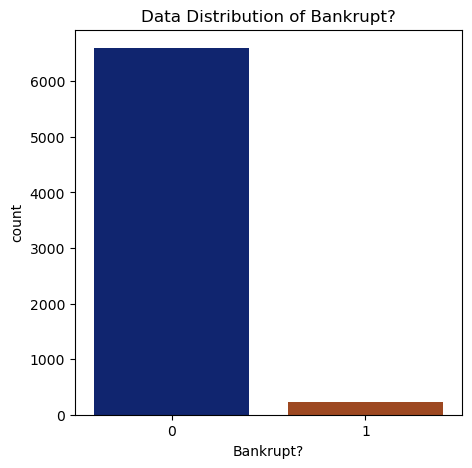

In [7]:
plt.figure(figsize=(5,5))
sns.countplot(x=dataframe["Bankrupt?"], palette="dark")
plt.title("Data Distribution of Bankrupt?")
plt.show()


Here we can notice that most of the data belongs to class 0, which means dataset is unbalanced.

In [8]:
numeric_features = dataframe.dtypes[dataframe.dtypes != 'int64'].index
categorical_features = dataframe.dtypes[dataframe.dtypes == 'int64'].index

dataframe[categorical_features].columns.tolist()

['Bankrupt?', ' Liability-Assets Flag', ' Net Income Flag']

There are only three categorical data columns, we will first explore these columns

In [13]:
dataframe.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

 Liability-Assets Flag
0    6811
1       8
Name: count, dtype: int64


<Axes: xlabel=' Liability-Assets Flag', ylabel='count'>

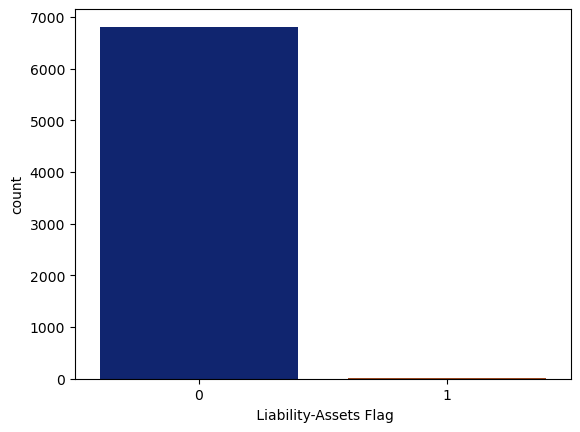

In [9]:
print(dataframe[' Liability-Assets Flag'].value_counts())
sns.countplot(x=' Liability-Assets Flag', data=dataframe, palette="dark")


The "Liability-Assets" flag denotes the status of an organization, where if the total liability exceeds total assets, the flagged value will be 1, else the value is 0. A majority number of times, organizations/company's assets are more than their liabilities.

In [27]:
dataframe['Bankrupt?'] = dataframe['Bankrupt?'].astype(str)


 Liability-Assets Flag  Bankrupt?
0                       0            6597
                        1             214
1                       1               6
                        0               2
Name: count, dtype: int64


<Axes: xlabel=' Liability-Assets Flag', ylabel='count'>

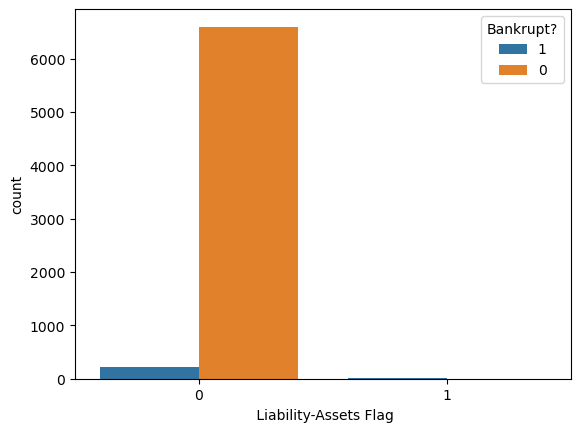

In [28]:
print(dataframe[[' Liability-Assets Flag', 'Bankrupt?']].value_counts())
sns.countplot(x=' Liability-Assets Flag', hue='Bankrupt?', data=dataframe)


A small portion of organizations suffers bankruptcy,

although possessing more assets than their liabilities.

<Axes: xlabel='Bankrupt?', ylabel='count'>

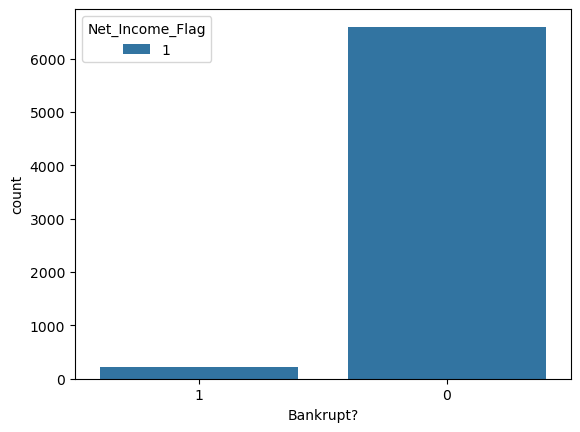

In [47]:

dataframe['Net_Income_Flag'] = dataframe['Net_Income_Flag'].astype(str)

# Plot using the correct column name
sns.countplot(x='Bankrupt?', hue='Net_Income_Flag', data=dataframe)


<Axes: xlabel='Net_Income_Flag', ylabel='count'>

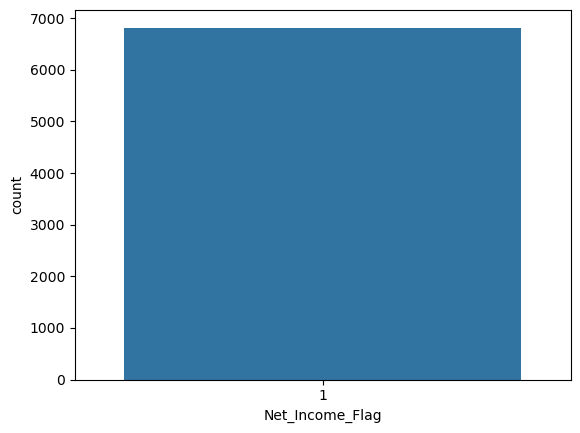

In [53]:
sns.countplot(x='Net_Income_Flag', data=dataframe)


The "Net Income" flag denotes the status of an organization's income in the last two years, where if the net income is negative for the past two years, the flagged value will be 1, else the value is 0. We observe that all the records have been exhibiting a loss for the past two years.

Net_Income_Flag  Bankrupt?
1                0            6599
                 1             220
Name: count, dtype: int64


<Axes: xlabel='Net_Income_Flag', ylabel='count'>

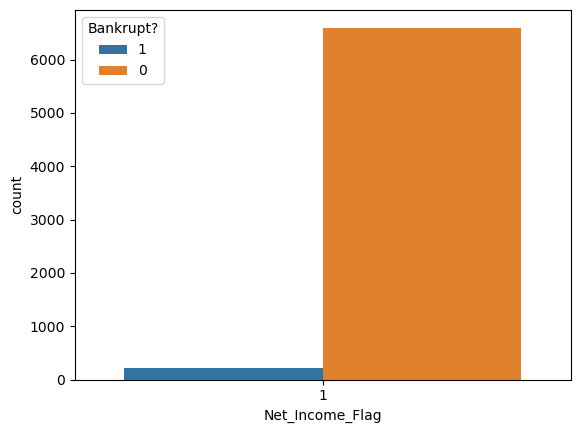

In [48]:
print(dataframe[['Net_Income_Flag', 'Bankrupt?']].value_counts())
sns.countplot(x='Net_Income_Flag', hue='Bankrupt?', data=dataframe)


Many organizations that have suffered losses for the past two years have stabilized their business, thus avoiding bankruptcy.

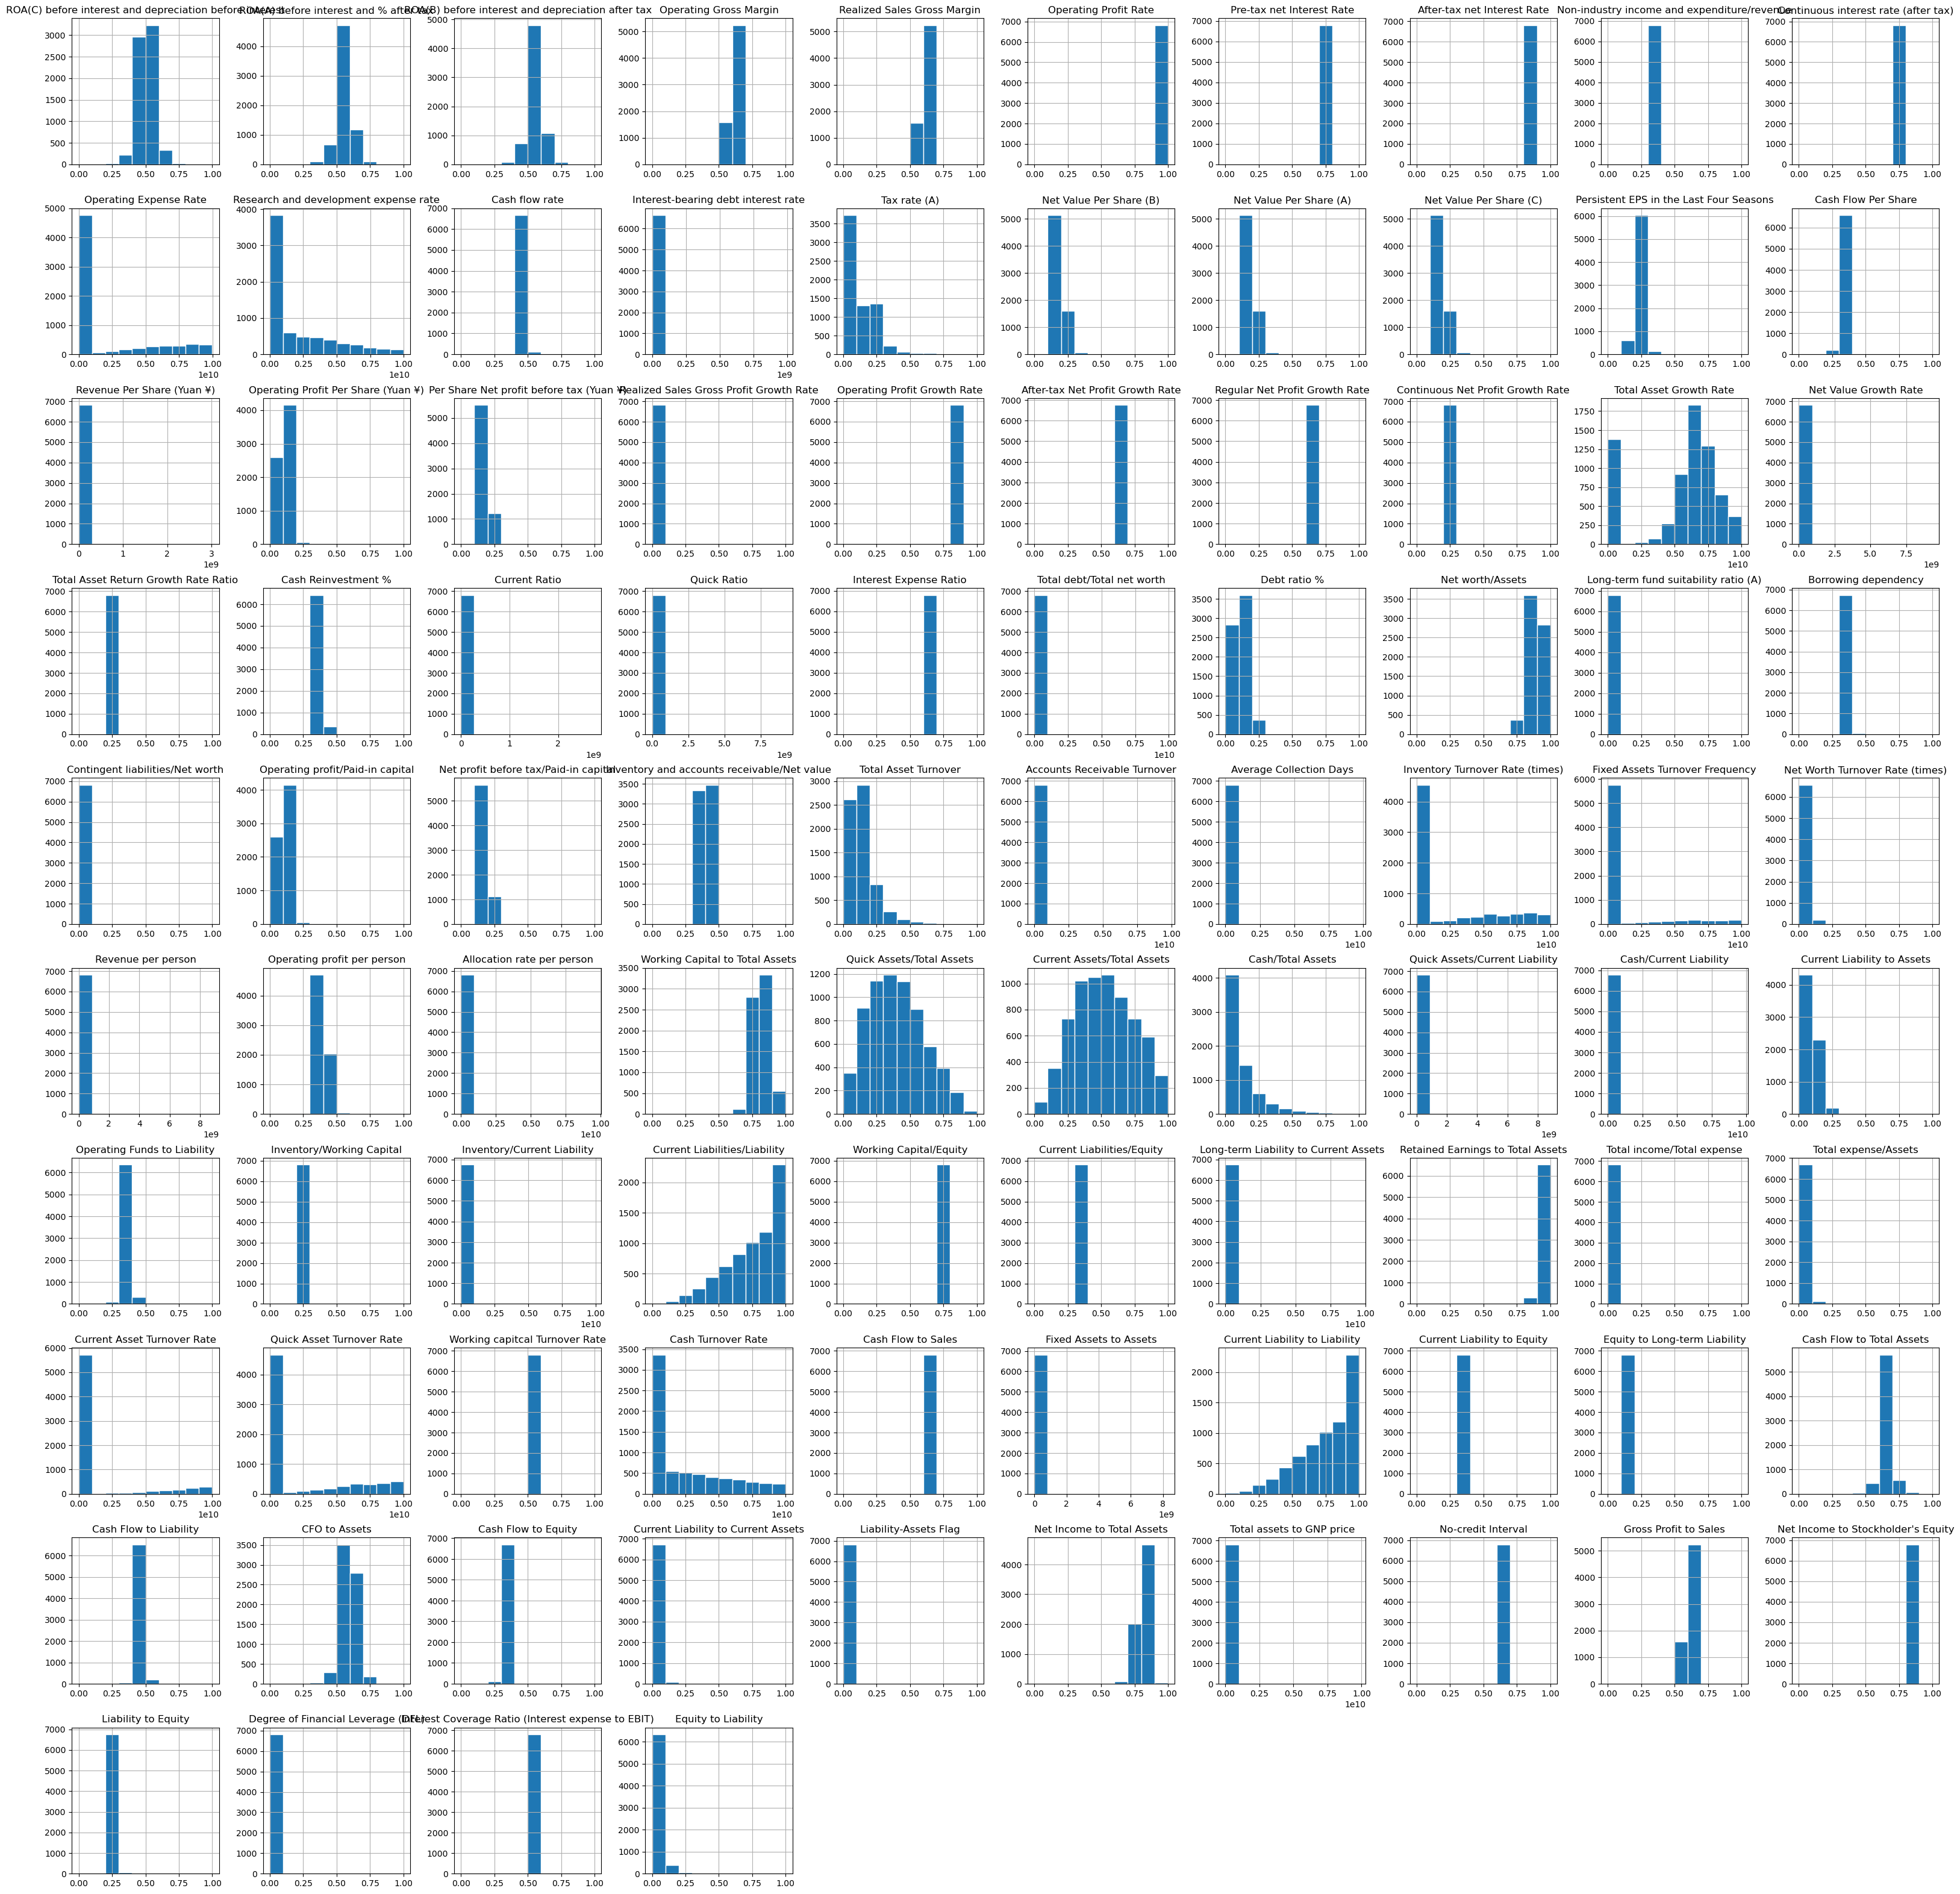

In [64]:
dataframe.hist(figsize=(40,40), edgecolor='white')
plt.show()


In [61]:
dataframe.columns = dataframe.columns.str.strip()


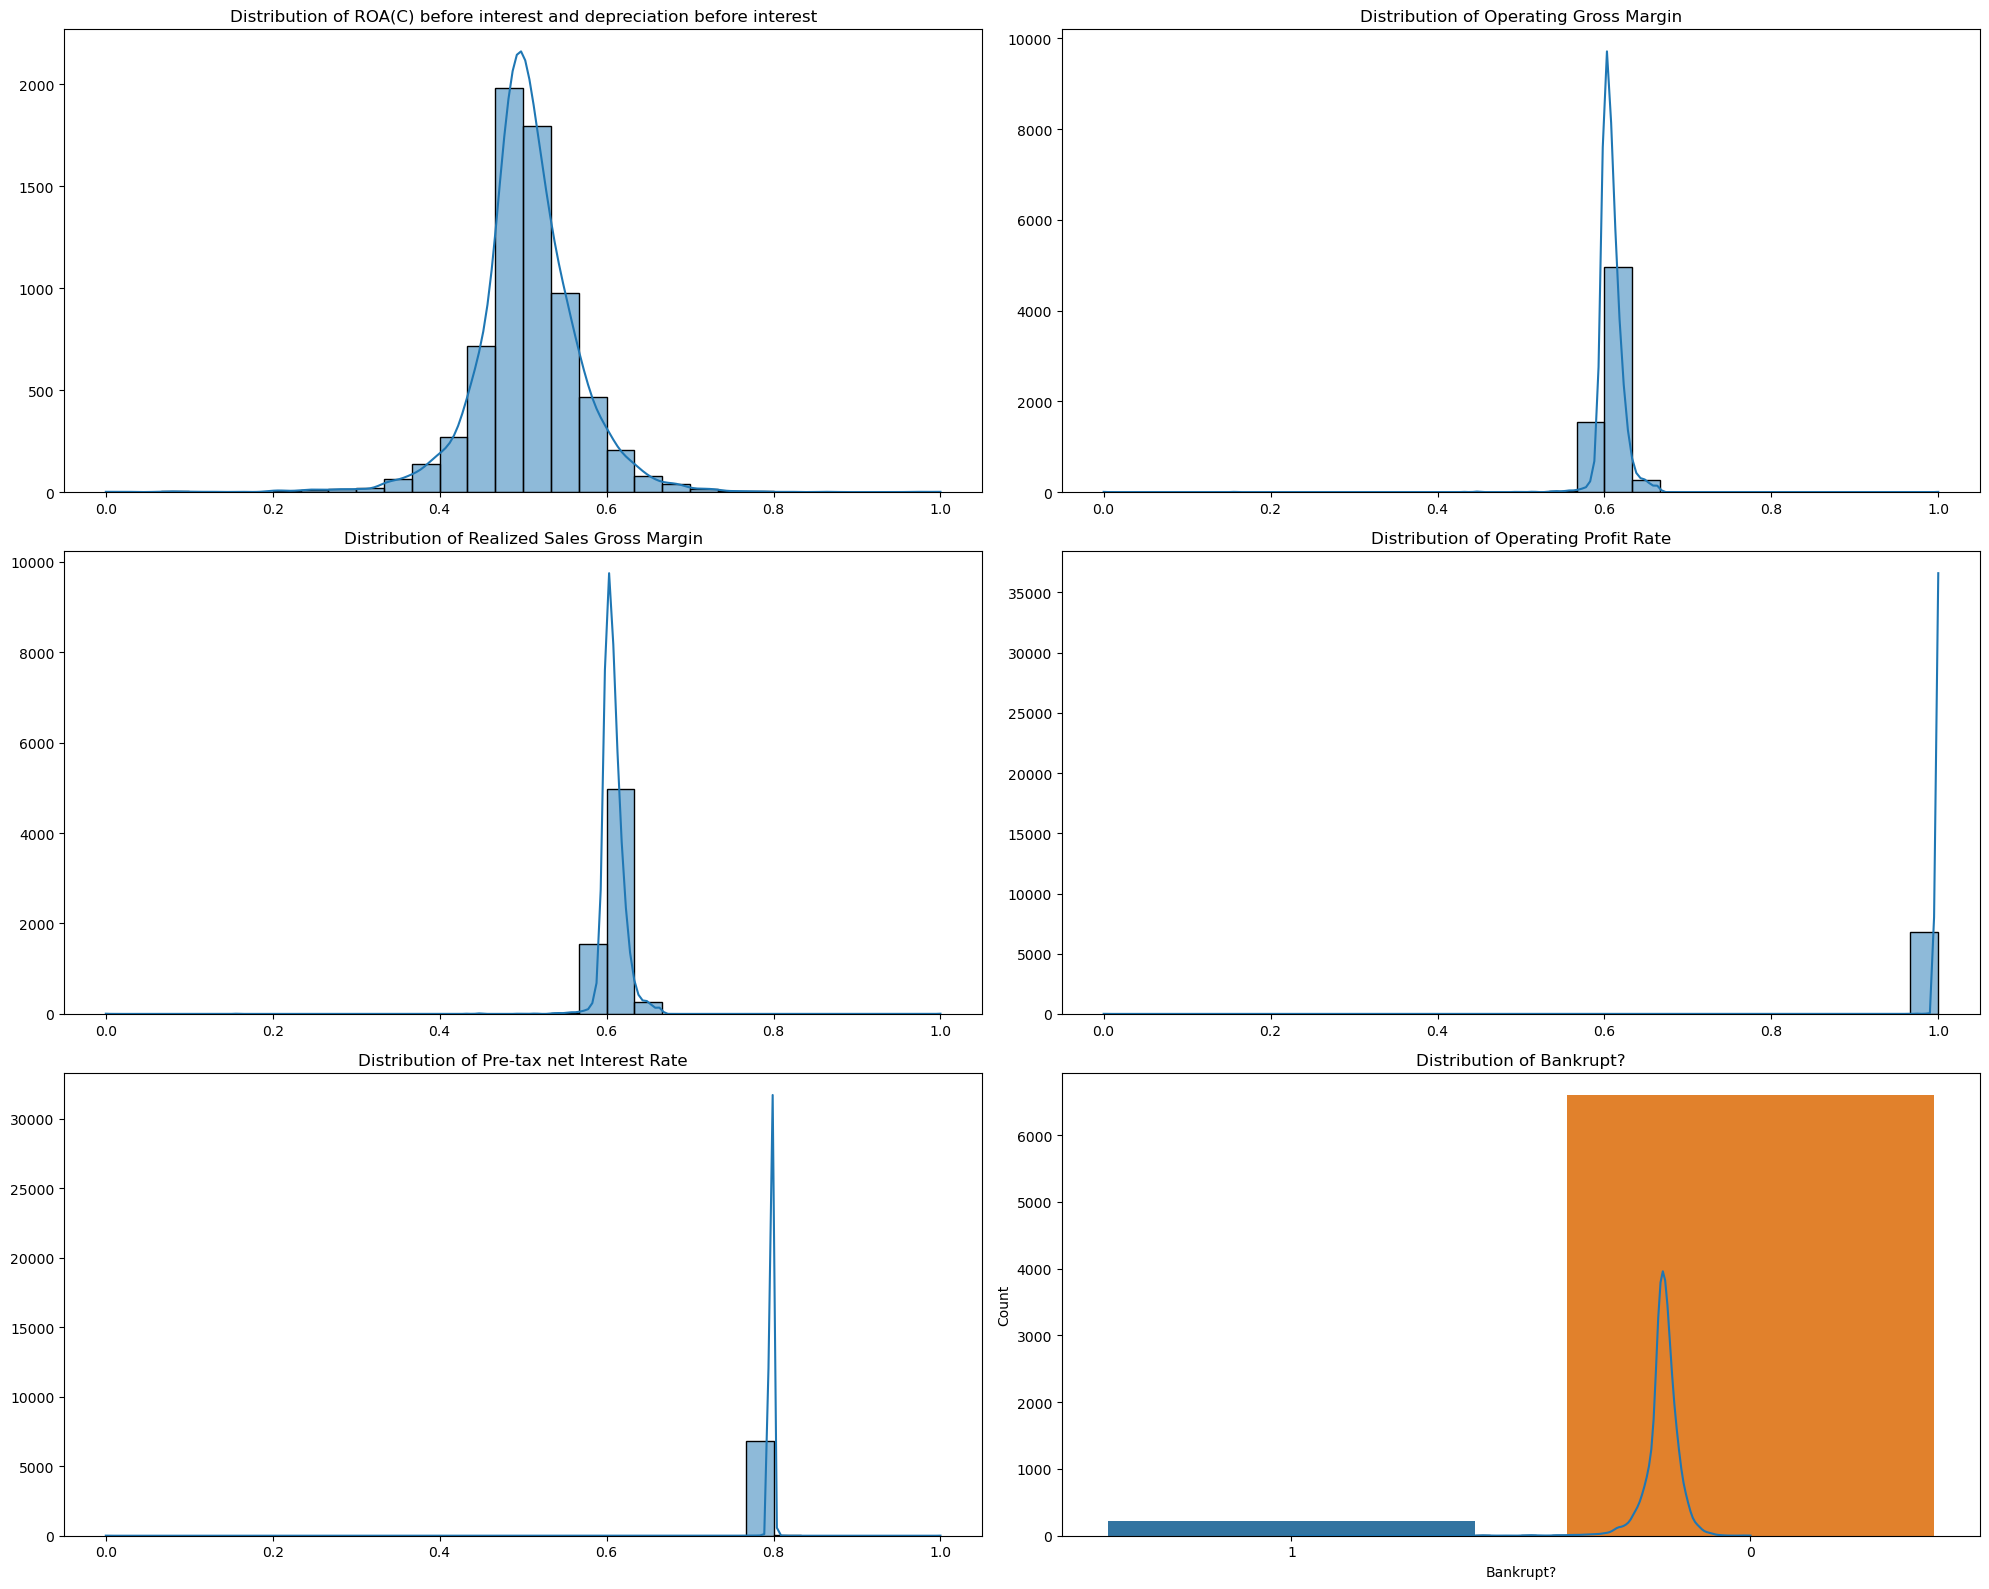

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 16))
features = [
    'ROA(C) before interest and depreciation before interest', 
    'Operating Gross Margin', 
    'Realized Sales Gross Margin', 
    'Operating Profit Rate', 
    'Pre-tax net Interest Rate',
    'Net Income to Total Assets'
]

for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(dataframe[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('')
    plt.ylabel('')

plt.subplot(3, 2, 6)
sns.countplot(x='Bankrupt?', data=dataframe)
plt.title('Distribution of Bankrupt?')
plt.xlabel('Bankrupt?')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [79]:
# Calculate positive correlations
positive_corr = dataframe[numeric_features].corrwith(dataframe["Bankrupt?"]).sort_values(ascending=False)[:6].index.tolist()

# Calculate negative correlations
negative_corr = dataframe[numeric_features].corrwith(dataframe["Bankrupt?"]).sort_values()[:6].index.tolist()

# Create DataFrames for positive and negative correlations
positive_corr_df = dataframe[positive_corr + ["Bankrupt?"]].copy()
negative_corr_df = dataframe[negative_corr + ["Bankrupt?"]].copy()


For the sake of simplicity, we analyze the six top positively and negatively correlated attributes.

In [152]:
def corrbargraph(x_value, y_values, dataframe):
    num_plots = len(y_values)
    cols = 3  # Number of columns in your subplot grid
    rows = -(-num_plots // cols)  # Ceiling division to determine number of rows needed

    plt.figure(figsize=(15, 8))

    for i in range(num_plots):
        plt.subplot(rows, cols, i+1)  
        sns.barplot(x=x_value, y=y_values[i], data=dataframe)

    plt.tight_layout(pad=0.5)


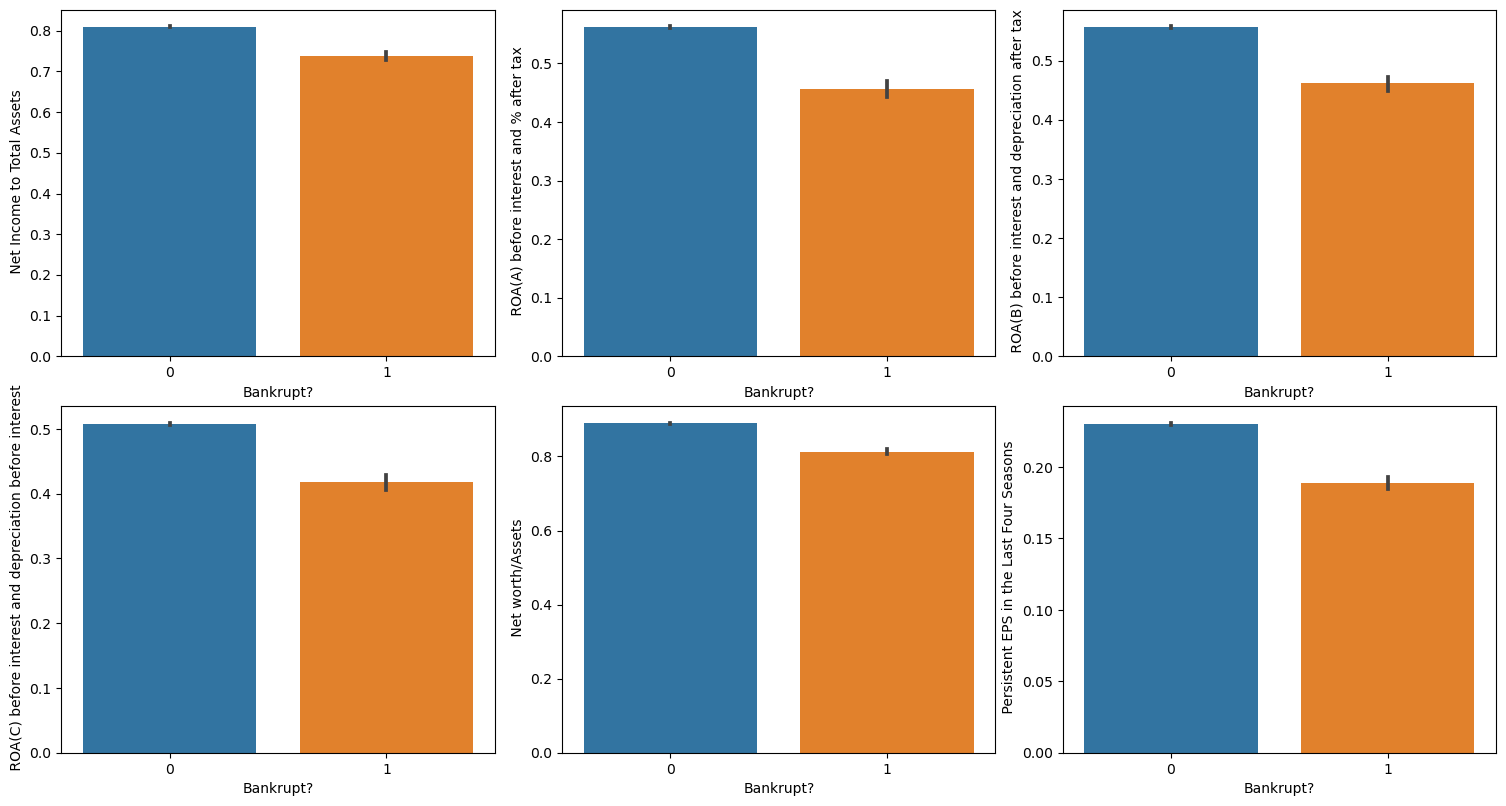

In [154]:
x_value = negative_corr.columns.tolist()[-1]
y_value = negative_corr.columns.tolist()[:-1]

corrbargraph(x_value, y_value,dataframe)

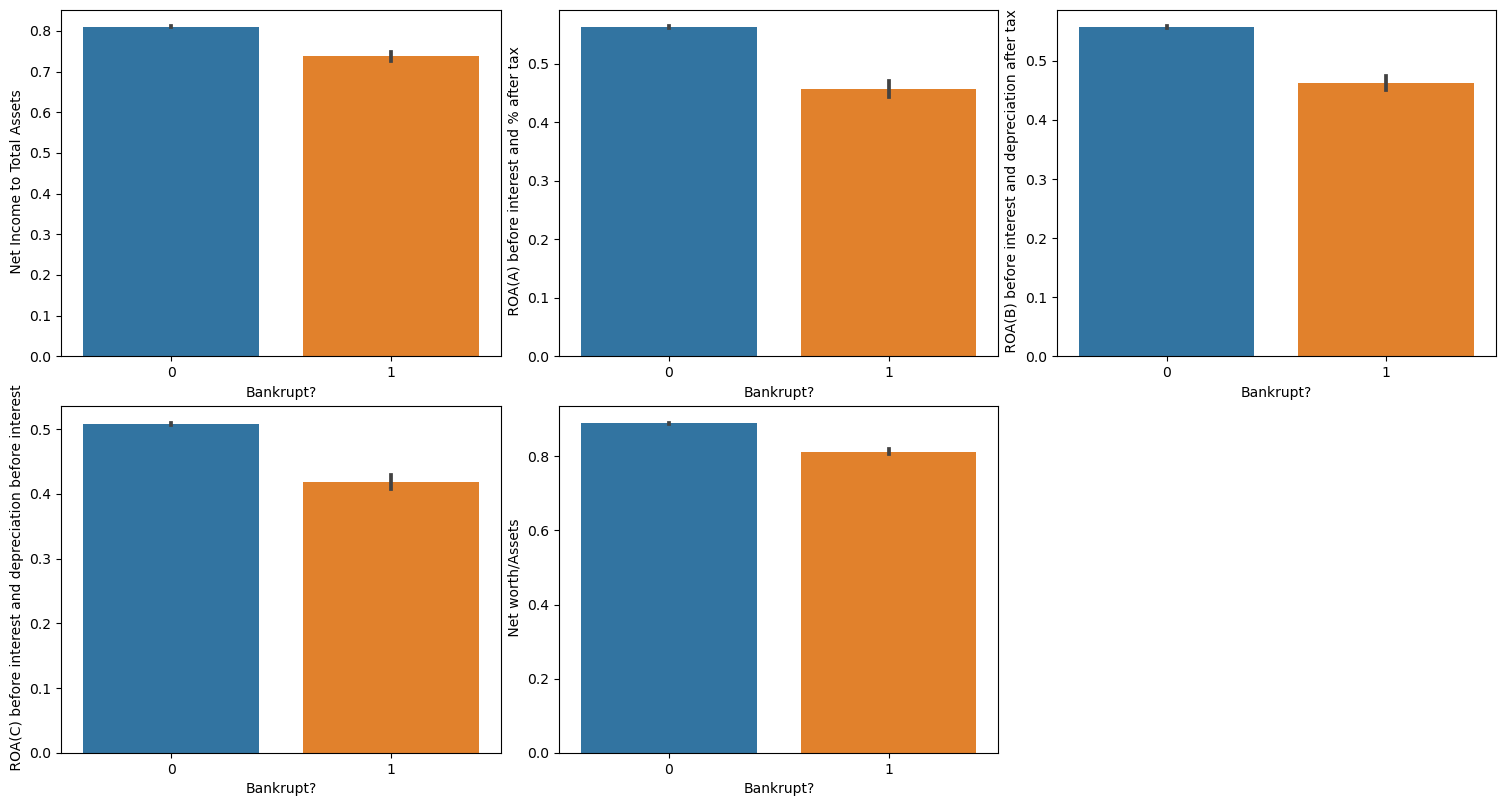

In [87]:
x_value = "Bankrupt?"
y_value = negative_corr[:-1]  # Assuming negative_corr is a list of column names

corrbargraph(x_value, y_value, negative_corr_df)  # Make sure to pass the correct dataframe


These attributes show us that the more the assets and earing of a company, the less likely is the organization to be bankrupt.
Let us check the relation of top six positive and negative correlation attributes among eachother



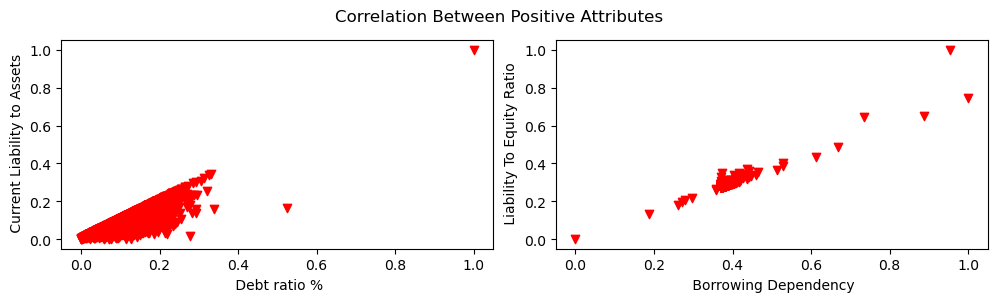

In [101]:
plt.figure(figsize=(10,3))

plt.suptitle("Correlation Between Positive Attributes")

plt.subplot(1,2,1)
plt.xlabel(" Debt ratio %")
plt.ylabel(' Current Liability to Assets')
plt.scatter(dataframe[' Debt ratio %'],dataframe[' Current Liability to Assets'], marker='v',color = 'red')

plt.subplot(1,2,2)
plt.xlabel(' Borrowing Dependency')
plt.ylabel(" Liability To Equity Ratio")
plt.scatter(dataframe[' Borrowing dependency'],dataframe[' Liability to Equity'], marker='v',color = 'red')

plt.tight_layout(pad=0.8)

There is a positive relation between attributes that have a high correlation with the target attribute

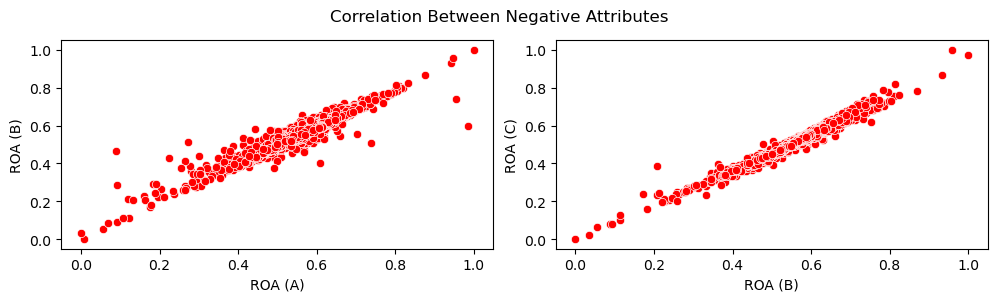

In [171]:
plt.figure(figsize=(10,3))

plt.suptitle("Correlation Between Negative Attributes")

plt.subplot(1,2,1)
plt.xlabel("ROA (A)")
plt.ylabel("ROA (B)")
sns.scatterplot(data=dataframe, x=' ROA(A) before interest and % after tax', y=' ROA(B) before interest and depreciation after tax',color = 'red')

plt.subplot(1,2,2)
plt.xlabel("ROA (B)")
plt.ylabel("ROA (C)")
sns.scatterplot(data=dataframe, x= ' ROA(B) before interest and depreciation after tax', y=' ROA(C) before interest and depreciation before interest',color = 'red')

plt.tight_layout(pad=0.8)

 There is a positive relation between attributes that have a low correlation with the target attribute.



In [139]:
positive_corr = dataframe[numeric_features].corrwith(dataframe["Bankrupt?"]).sort_values(ascending=False)[:6].index.tolist()
negative_corr = dataframe[numeric_features].corrwith(dataframe["Bankrupt?"]).sort_values()[:6].index.tolist()

positive_corr = dataframe[positive_corr + ["Bankrupt?"]].copy()
negative_corr = dataframe[negative_corr + ["Bankrupt?"]].copy()

<Axes: >

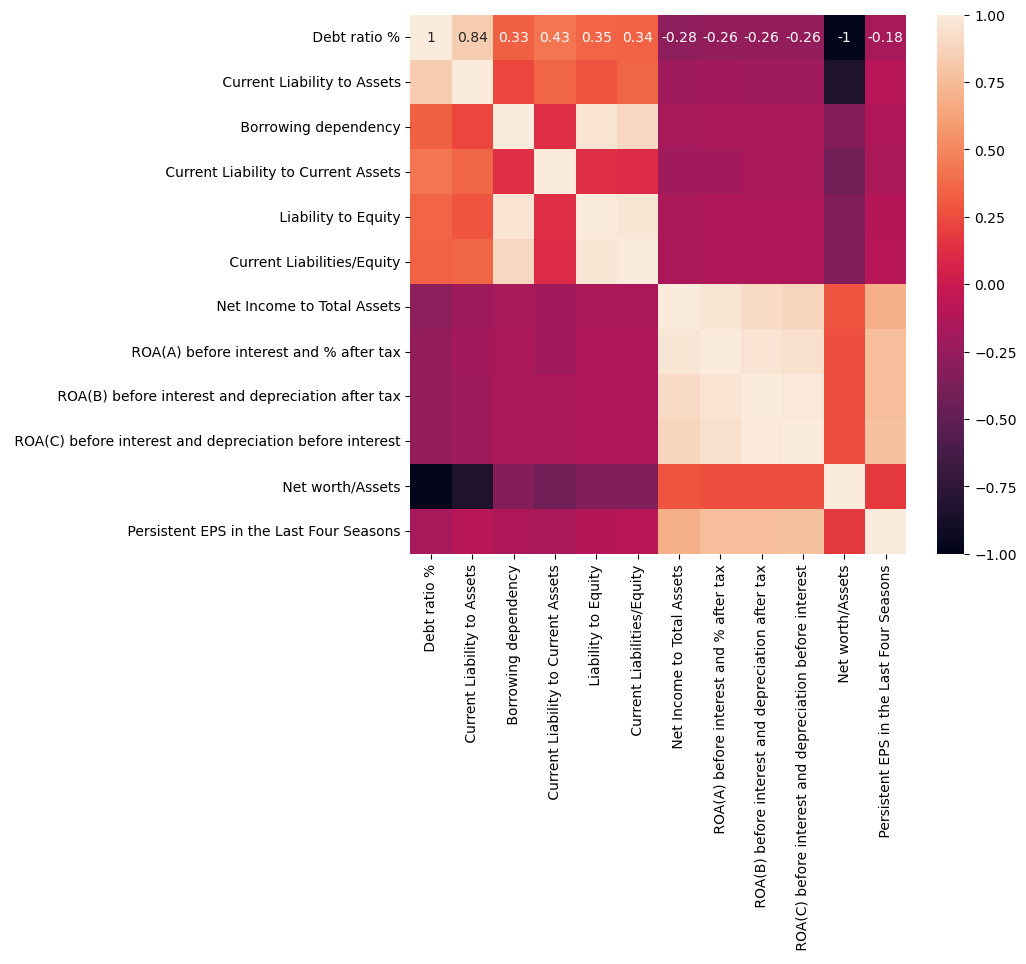

In [160]:
relation = positive_corr.columns.tolist()[:-1] + negative_corr.columns.tolist()[:-1]
plt.figure(figsize=(8,7))
sns.heatmap(dataframe[relation].corr(),annot=True)

A total correlation of the top 12 attributes are given above

Summary of Analysis

The number of organizations that have gone bankrupt in 10 years between 1999 – 2000 is few.

Several companies possess many assets, which is always a good sign for an organization.

An organization cannot guarantee not being bankrupt, although owning several assets.

The organizations in the dataset are running into losses for the past two years as their net income poses to be negative.
Very few of the organizations that have had negative income in the past two years suffer from bankruptcy.

It is observed that “Debt Ratio %, Current Liability To Assets, Current Liability To Current Assets" 
attributes are a few of the attributes that have a high correlation with the target attribute.

An increase in the values of the attributes “Debt Ratio %, Current Liability To Assets, Current Liability To Current Assets” causes an organization to suffer heavy losses, thus resulting in bankruptcy.
An increase in the values of the attributes that have a negative correlation with the target attribute helps an organization avoid bankruptcy.

There seems to be a relation between attributes that have a high correlation with the target attribute and a low correlation with the target attribute.

We observed several correlations among the top 12 attributes, one of which being “Net Worth/Assets and Debt Ratio %” that is negatively correlated with one another.


In [199]:
df_corr_bar = dataframe.corr()["Bankrupt?"].sort_values()[:-1]
fig = px.bar(df_corr_bar, orientation="h", color_discrete_sequence=["#C1E1C1"])
fig.update_layout(showlegend=False)
fig.show()


#Hypothesis Testing

In [164]:
# Define the target variable
target = 'Bankrupt?'

# Separate continuous and categorical features
continuous_features = dataframe.select_dtypes(include=['float64', 'int64']).columns.drop(target)
categorical_features = dataframe.select_dtypes(include=['object', 'category']).columns


In [173]:
# Separate data into bankrupt and non-bankrupt
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

bankrupt_data = dataframe[dataframe[target] == 1]
non_bankrupt_data = dataframe[dataframe[target] == 0]

# Perform t-test for each continuous feature
ttest_results = {}


In [175]:
for feature in continuous_features:
    t_stat, p_val = ttest_ind(bankrupt_data[feature], non_bankrupt_data[feature], nan_policy='omit')
    ttest_results[feature] = p_val

# Convert results to a DataFrame
ttest_results_df = pd.DataFrame(ttest_results.items(), columns=['Feature', 'P-Value'])
ttest_results_df['Significant'] = ttest_results_df['P-Value'] < 0.05


In [176]:
ttest_results_df = pd.DataFrame(ttest_results.items(), columns=['Feature', 'P-Value'])
ttest_results_df['Significant'] = ttest_results_df['P-Value'] < 0.05

In [179]:
# Perform chi-square test for each categorical feature
chi2_results = {}
for feature in categorical_features:
    contingency_table = pd.crosstab(data[feature], data[target])
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    chi2_results[feature] = p_val

# Convert results to a DataFrame
chi2_results_df = pd.DataFrame(chi2_results.items(), columns=['Feature', 'P-Value'])
chi2_results_df['Significant'] = chi2_results_df['P-Value'] < 0.05


In [180]:
# Combine the results
all_results_df = pd.concat([ttest_results_df, chi2_results_df])

# Display significant features
significant_features = all_results_df[all_results_df['Significant']]
print(significant_features)


                                              Feature        P-Value  \
0    ROA(C) before interest and depreciation befor...  1.950813e-106   
1              ROA(A) before interest and % after tax  1.033741e-125   
2    ROA(B) before interest and depreciation after...  7.094590e-117   
3                              Operating Gross Margin   1.225969e-16   
4                         Realized Sales Gross Margin   1.859407e-16   
11              Research and development expense rate   4.539929e-02   
12                                     Cash flow rate   2.208652e-09   
14                                       Tax rate (A)   1.037347e-19   
15                            Net Value Per Share (B)   5.058196e-43   
16                            Net Value Per Share (A)   4.685137e-43   
17                            Net Value Per Share (C)   1.034332e-42   
18            Persistent EPS in the Last Four Seasons   3.201175e-75   
19                                Cash Flow Per Share   1.459335

In [204]:
X = dataframe.drop(["Bankrupt?", " Net Income Flag"], axis=1)
y = dataframe["Bankrupt?"]

### Reducing the number of dimensions

In [215]:
F_values = f_classif(X, y)[0]
print(F_values)

[4.97535121e+02 5.93228629e+02 5.49202093e+02 6.89187554e+01
 6.80891088e+01 3.60046943e-04 4.94483709e-01 5.34838361e-01
 1.87734346e+00 4.80452782e-01 2.52276733e-01 4.00521439e+00
 3.58770440e+01 3.62784529e+00 8.30443372e+01 1.91736866e+02
 1.91893599e+02 1.90273698e+02 3.45267517e+02 4.12096205e+01
 1.50081075e-01 1.40388750e+02 2.88185465e+02 1.43235885e-03
 1.56872485e+00 9.74554136e+00 9.25427512e+00 6.02518992e-01
 1.34841658e+01 2.92192096e+01 1.93781500e+00 1.80193666e+01
 3.33336591e-02 4.28320538e+00 4.89968997e-02 1.03378029e+00
 4.55091151e+02 4.55091151e+02 1.95215130e+00 2.19303339e+02
 3.40073045e+01 1.38500753e+02 3.07823235e+02 3.88506635e+01
 3.15889105e+01 1.54062607e-01 2.92973843e-01 1.29042565e-02
 3.63398317e+01 3.03323612e+00 1.07712008e+01 5.92711410e+01
 5.45508987e-02 2.63987646e+02 5.12499829e+01 1.37238238e+01
 6.90398135e+01 9.96226941e-02 4.16436074e+01 2.68012458e+02
 4.07461815e+01 2.47740439e-02 4.60719630e-03 2.95323127e+00
 1.51024877e+02 1.652214

In [216]:
selector = SelectKBest(f_classif, k=32)
X_fs = selector.fit_transform(X, y)

In [217]:
print("Data with initial features")
pd.DataFrame(X).head(3)

Data with initial features


ROA(C) before interest and depreciation before interest  \
0                                          -2.217747          
1                                          -0.673779          
2                                          -1.303576          

    ROA(A) before interest and % after tax  \
0                                -2.045648   
1                                -0.311045   
2                                -0.908353   

    ROA(B) before interest and depreciation after tax  \
0                                          -2.400185    
1                                          -0.598406    
2                                          -1.319813    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                -0.383306                     -0.382610   
1                 0.135058                      0.136297   
2                -0.383731                     -0.388148   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.016455                   -0.023514   
1                0.014669                    0.014798   
2                0.007857                   -0.061107   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                     -0.020163                                     -0.087472   
1                      0.015965                                     -0.005956   
2                     -0.051179                                     -0.142227   

    Continuous interest rate (after tax)  ...   Liability-Assets Flag  \
0                              -0.031279  ...                       0   
1                               0.009823  ...                       0   
2                              -0.086560  ...                       0   

    Net Income to Total Assets   Total assets to GNP price  \
0                    -2.254152                   -0.049487   
1                    -0.309011                   -0.049487   
2                    -0.820449                   -0.049487   

    No-credit Interval   Gross Profit to Sales  \
0            -0.084268               -0.383437   
1            -0.021387                0.135243   
2            -0.005984               -0.383670   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                            -0.861548              0.680121   
1                            -0.029802              0.240667   
2                            -0.249802              0.679197   

    Degree of Financial Leverage (DFL)  \
0                            -0.060026   
1                            15.128707   
2                            -0.062957   

    Interest Coverage Ratio (Interest expense to EBIT)   Equity to Liability  
0                                          -0.098971               -0.622022  
1                                           0.364532               -0.535534  
2                                          -0.125006               -0.621914  

[3 rows x 94 columns]

In [218]:
print("Data with selected features")
X_fs = X[selector.get_feature_names_out()]
X_fs.head(3)

Data with selected features


ROA(C) before interest and depreciation before interest  \
0                                          -2.217747          
1                                          -0.673779          
2                                          -1.303576          

    ROA(A) before interest and % after tax  \
0                                -2.045648   
1                                -0.311045   
2                                -0.908353   

    ROA(B) before interest and depreciation after tax  \
0                                          -2.400185    
1                                          -0.598406    
2                                          -1.319813    

    Operating Gross Margin   Tax rate (A)   Net Value Per Share (B)  \
0                -0.383306      -0.829327                 -1.279154   
1                 0.135058      -0.829327                 -0.251859   
2                -0.383731      -0.829327                 -0.381848   

    Net Value Per Share (A)   Net Value Per Share (C)  \
0                 -1.275135                 -1.276053   
1                 -0.250410                 -0.251531   
2                 -0.380075                  0.090815   

    Persistent EPS in the Last Four Seasons  \
0                                 -1.793974   
1                                 -0.597335   
2                                 -1.450047   

    Operating Profit Per Share (Yuan ¥)  ...   Total expense/Assets  \
0                             -0.471337  ...               1.313931   
1                             -0.550018  ...              -0.135116   
2                             -0.599557  ...              -0.287183   

    Current Liability to Equity   Equity to Long-term Liability  \
0                      0.568445                        0.558387   
1                     -0.123788                        0.269927   
2                      0.249633                        0.116629   

    CFO to Assets   Current Liability to Current Assets  \
0       -1.247139                              2.812287   
1       -0.449343                              0.527446   
2       -0.937910                             -0.199706   

    Liability-Assets Flag   Net Income to Total Assets  \
0                       0                    -2.254152   
1                       0                    -0.309011   
2                       0                    -0.820449   

    Gross Profit to Sales   Net Income to Stockholder's Equity  \
0               -0.383437                            -0.861548   
1                0.135243                            -0.029802   
2               -0.383670                            -0.249802   

    Liability to Equity  
0              0.680121  
1              0.240667  
2              0.679197  

[3 rows x 32 columns]

In [219]:
X_train, X_test, y_train, y_test = train_test_split(
    X_fs, y, stratify=y, test_size=0.20, random_state=42
)

In [220]:
oversample = ADASYN(random_state=42, sampling_strategy="minority")

In [221]:
X_train, y_train = oversample.fit_resample(X_train, y_train)

<Axes: xlabel='Bankrupt?', ylabel='count'>

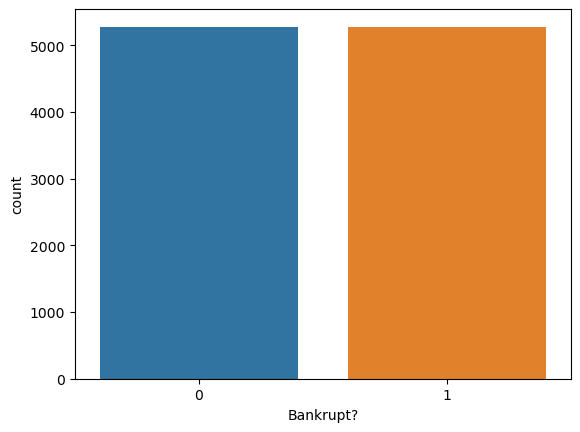

In [222]:
sns.countplot(data=X_train, x=y_train)

In [223]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#model training 

In [224]:
models_comparison = {}

In [227]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

warnings.filterwarnings("ignore")

i = 0
models_name = [
    "DecisionTreeClassifier",
    "RandomForestClassifier",
    "KNeighborsClassifier",
    "XGBClassifier",
    "LogisticRegression",  # Added Logistic Regression here
]

models = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    KNeighborsClassifier(),
    XGBClassifier(random_state=42),
    LogisticRegression(random_state=42)  # Added Logistic Regression here
]

for model in models:
    print(f"Model: {models_name[i]}\n")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("-" * 30, "\n")
    
    # Ensure models_comparison is defined as a dictionary before this loop
    models_comparison[f"{models_name[i]}"] = [
        accuracy_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        roc_auc_score(y_test, y_pred),
    ]
    
    i += 1 


Model: DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1320
           1       0.21      0.48      0.29        44

    accuracy                           0.93      1364
   macro avg       0.60      0.71      0.63      1364
weighted avg       0.96      0.93      0.94      1364

------------------------------ 

Model: RandomForestClassifier

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1320
           1       0.33      0.64      0.44        44

    accuracy                           0.95      1364
   macro avg       0.66      0.80      0.70      1364
weighted avg       0.97      0.95      0.96      1364

------------------------------ 

Model: KNeighborsClassifier

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1320
           1       0.18      0.68      0.28        44

    accuracy             

In [228]:
models_com_df = pd.DataFrame(models_comparison).T
models_com_df.columns = [
    "Model Accuracy",
    "Model F1-Score",
    "Precision",
    "Recall",
    "ROC-AUC Score",
]
models_com_df = models_com_df.sort_values(by="Model F1-Score", ascending=False)
models_com_df.style.format("{:.2%}").background_gradient(cmap="Blues")

### Model Interpretation and Insights

#### Interpret Model Coefficients to Understand Feature Impact
1. **XGBClassifier**:
   - **Feature Importance**: The XGBClassifier allows for interpretation of feature importance directly. Typically, features with higher importance scores are more influential in determining the model’s predictions. You can extract and rank these features to understand which variables most impact the predictions.

2. **RandomForestClassifier**:
   - **Feature Importance**: Similar to XGBClassifier, the RandomForestClassifier provides feature importances. This can be accessed through the `feature_importances_` attribute. Analyzing these importances will reveal which features the model relies on most heavily.

3. **DecisionTreeClassifier**:
   - **Feature Importance**: DecisionTreeClassifier also provides feature importances, which indicate how significant each feature is in splitting the data. These can be visualized to understand the model's decision-making process.

4. **LogisticRegression**:
   - **Coefficients**: The coefficients in a logistic regression model indicate the strength and direction of the relationship between each feature and the target variable. Positive coefficients increase the likelihood of the target class (1), while negative coefficients decrease it. Standardizing features before fitting the model can help in comparing the magnitude of these coefficients.

5. **KNeighborsClassifier**:
   - **Feature Impact**: KNeighborsClassifier doesn’t provide feature importances directly. However, the performance of the model can be analyzed with feature selection techniques to understand which features contribute most to the model’s accuracy.

#### Summarize Key Insights and Discuss Implications for Financial Risk Management

1. **Model Performance**:
   - The XGBClassifier outperformed the other models with the highest accuracy (95.45%), F1-score (49.18%), and ROC-AUC score (82.27%). This indicates it is the best model for distinguishing between the two classes, particularly in financial risk scenarios.
   - RandomForestClassifier also performed well with a close accuracy (94.72%) and F1-score (43.75%), making it a reliable alternative.
   - LogisticRegression, while having lower accuracy (86.66%), showed a high recall (84.09%), indicating it is good at identifying the minority class, which is crucial in financial risk management to identify potential risks accurately.

2. **Class Imbalance**:
   - The minority class (1) is significantly underrepresented, which is a common challenge in financial risk datasets. Models like XGBClassifier and RandomForestClassifier handle this better, as seen from their relatively higher recall and F1-scores for class 1.

3. **Feature Impact**:
   - Identifying and focusing on the most important features can help in understanding the underlying patterns of financial risk. For instance, features such as credit history, transaction patterns, and customer demographics might be crucial in predicting financial risks.

4. **Actionable Insights**:
   - **Enhanced Monitoring**: Focus on the features identified as most important by XGBClassifier and RandomForestClassifier for enhanced monitoring and early detection of potential financial risks.
   - **Balanced Datasets**: Use techniques like SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset and improve the model’s ability to learn from the minority class.
   - **Regular Updates**: Continuously update the models with new data to ensure they adapt to changing financial environments and maintain high performance.
   - **Feature Engineering**: Invest in feature engineering to create new variables that better capture the underlying risk factors. This could include aggregating transaction data over time or incorporating external economic indicators.

#### Provide Actionable Recommendations

1. **Adopt XGBoost and RandomForest Models**:
   - Implement the XGBClassifier for its superior performance in distinguishing financial risk cases.
   - Use RandomForestClassifier as a backup model for cross-verifying the results and ensuring robustness.

2. **Data Balancing Techniques**:
   - Implement over-sampling or under-sampling techniques to address class imbalance, improving the model's sensitivity to minority class instances.

3. **Continuous Model Evaluation**:
   - Regularly evaluate and update the models to ensure they remain effective in the face of evolving financial patterns and risk factors.

4. **Enhanced Risk Monitoring Systems**:
   - Develop a risk monitoring system that focuses on the key features identified by the models. This system should provide real-time alerts and detailed analysis for potential risks.

5. **Stakeholder Communication**:
   - Communicate the insights and model interpretations to key stakeholders in a clear and concise manner. Provide training on understanding model outputs and integrating them into the decision-making process.

By implementing these strategies, the organization can significantly enhance its ability to predict and manage financial risks, leading to better-informed decisions and improved financial stability.